In [1]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import numpy as np
import re
import Levenshtein
import json
from difflib import SequenceMatcher

In [2]:
ktp_path = "Dataset/ktp2.png"

In [3]:
def levenshtein_religion(religion):
    score = 100
    winner = ""
    if Levenshtein.distance(religion, "ISLAM") < score :
        score = Levenshtein.distance(religion, "ISLAM")
        winner = "ISLAM"
    if Levenshtein.distance(religion, "KRISTEN") < score :
        score = Levenshtein.distance(religion, "KRISTEN")
        winner = "KRISTEN"
    if Levenshtein.distance(religion, "KATHOLIK") < score :
        score = Levenshtein.distance(religion, "KATHOLIK")
        winner = "KATHOLIK"
    if Levenshtein.distance(religion, "HINDU") < score :
        score = Levenshtein.distance(religion, "HINDU")
        winner = "HINDU"
    if Levenshtein.distance(religion, "BUDHA") < score :
        score = Levenshtein.distance(religion, "BUDHA")
        winner = "BUDHA"
    if Levenshtein.distance(religion, "KONGHUCHU") < score :
        score = Levenshtein.distance(religion, "KONGHUCHU")
        winner = "KONGHUCHU"
    return winner

def levenshtein_gender(gender):
    score = 100
    winner = ""
    if Levenshtein.distance(gender, "LAKI-LAKI") < score :
        score = Levenshtein.distance(gender, "LAKI-LAKI")
        winner = "LAKI-LAKI"
    if Levenshtein.distance(gender, "PEREMPUAN") < score :
        score = Levenshtein.distance(gender, "PEREMPUAN")
        winner = "PEREMPUAN"
    return winner

def levenshtein_nationality(nationality):
    score = 100
    winner = ""
    if Levenshtein.distance(nationality, "WNI") < score :
        score = Levenshtein.distance(nationality, "WNI")
        winner = "WNI"
    if Levenshtein.distance(nationality, "WNA") < score :
        score = Levenshtein.distance(nationality, "WNA")
        winner = "WNA"
    return winner

def levenshtein_mariage_status(mariage_status):
    score = 100
    winner = ""
    if Levenshtein.distance(mariage_status, "BELUM KAWIN") < score :
        score = Levenshtein.distance(mariage_status, "BELUM KAWIN")
        winner = "BELUM KAWIN"
    if Levenshtein.distance(mariage_status, "CERAI MATI") < score :
        score = Levenshtein.distance(mariage_status, "CERAI MATI")
        winner = "CERAI MATI"
    if Levenshtein.distance(mariage_status, "CERAI HIDUP") < score :
        score = Levenshtein.distance(mariage_status, "CERAI HIDUP")
        winner = "CERAI HIDUP"
    if Levenshtein.distance(mariage_status, "KAWIN") < score :
        score = Levenshtein.distance(mariage_status, "KAWIN")
        winner = "KAWIN"
    return winner

In [4]:
def similiar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [5]:
input_img = cv2.imread(ktp_path)
gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

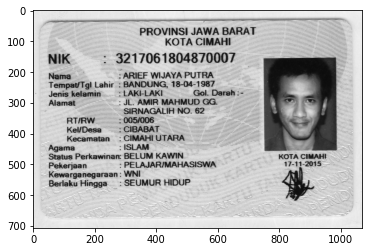

In [6]:
plt.imshow(gray, cmap='gray')
plt.show()

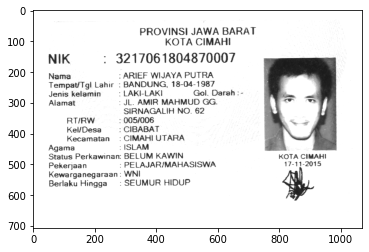

In [7]:
# norm_img = np.zeros((image_sharp.shape[0], gray.shape[1]))
# img = cv2.normalize(image_sharp, norm_img, 0, 255, cv2.NORM_MINMAX)
_, img = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
# img = cv2.GaussianBlur(img, (1, 1), 0)

plt.imshow(img, cmap='gray')
plt.show()

In [8]:
result = pytesseract.image_to_string((img), lang="eng")
print(result)

PROVINSI JAWA BARAT

KOTA CIMAHI
NIK : 3217061804870007
Nema > ARIEF WIJAYA PUTRA
Tempat/Tgi Lahir ; BANDUNG, 18-04-1987
Jenis kelamin ; LAKE-LAKI Gol. Darah :-
Alamat : JL. AMIR MAHMUD GG.
SIRNAGALIH NO. 62

RT/RW ; 005/006

Kel/Desa ; CIBABAT

Kecamatan : CIMAHI UTARA
Agama : ISLAM
Status Perkawinan: BELUM KAWIN KOTA CIMAHI
Pekerjaan : PELAJAR/MAHASISWA 17-11-2015
Kewarganegaraan: WNI

Berlaku Hingga

: SEUMUR HIDUP



In [9]:
nik = ""
nama = ""
tanggal_lahir = ""
tempat_lahir = ""
jenis_kelamin = ""
golongan_darah = ""
alamat = ""
kecamatan = ""
kelurahan_atau_desa = ""
kewarganegaraan = ""
pekerjaan = ""
agama = ""
status_perkawinan = ""
rt = ""
rw = ""

In [10]:
for word in result.split("\n"):
    # NORMALIZE
    if "”—" in word:
        word = word.replace("”—", ":")
  
    if ";" in word: word = word.replace(";", ":")
    if ">" in word: word = word.replace(">", ":")

    if similiar(word[0:3], "NIK") > 0.6:
        word = word.replace(word[0:3], "NIK")
    if "NIK" in word:
        nik_char = word.split()
        
        if "D" in word:
            word = word.replace("D", "0")
        if "?" in word:
            word = word.replace("?", "7")
        if "L" in word:
            word = word.replace("L", "1")
        if "l" in word:
            word = word.replace("l", "1")
        if "S" in word:
            word = word.replace("S", "5")  
        if "s" in word:
            word = word.replace("s", "5")  

        word = word.split(':')

        word_dict = {
            'b' : "6",
            'e' : "2",
        }

        res = ""
        
        for letter in word[-1].replace(" ", ""):
            if letter in word_dict:
                res += word_dict[letter]
            else:
                res += letter

        if ':' in res: res = res.replace(':', '')
        nik = res.lstrip()
        nik = nik[0:16]
        continue

    if similiar(word[0:4], "Nama") > 0.6:
        word = word.replace(word[0:4], "Nama")
    if "Nama" in word:
        word = word.split(':')
        nama = word[-1].replace('Nama ','')
        if ':' in nama: nama = res.replace(':', '')
        nama = re.search("[A-Z '.]+", nama)[0].lstrip()
        try:
            nama = re.search("[A-Z '.]+", nama)[0].lstrip()
        except:
            nama = ''
        continue

    if similiar(word[0:16], "Tempat/Tgl Lahir") > 0.7:
        word = word.replace(word[0:16], "Tempat/Tgl Lahir")
    if "Tempat/Tgl Lahir" in word:
        word = word.split(':')

        try:
            tanggal_lahir = re.search("([0-9]{2}\-[0-9]{2}\-[0-9]{4})", word[-1])[0]
            tempat_lahir = word[-1].replace(tanggal_lahir, '')
            tempat_lahir = re.search("[A-Z]+", tempat_lahir)[0]
            tempat_lahir = tempat_lahir.lstrip()
        except:
            tempat_lahir = ''
        
        continue
    
    if similiar(word[0:6], "Darah") > 0.6:
        word = word.replace(word[0:6], "Darah")
    if 'Darah' in word:
        try:
            jenis_kelamin = re.search("(LAKI-LAKI|LAKI|LELAKI|PEREMPUAN)", word)[0]
            jenis_kelamin = levenshtein_gender(jenis_kelamin)
        except:
            jenis_kelamin = ''
        

        word = word.split(':')
        try:
            golongan_darah = re.search("(O|A|B|AB)", word[-1])[0]
            golongan_darah = golongan_darah.lstrip()
        except:
            golongan_darah = '-'

    if similiar(word[0:6], "Alamat") > 0.75:
        word = word.replace(word[0:6], "Alamat")
    if 'Alamat' in word:
        word_dict = {
            '|' : "1"
        }

        res = ""

        for letter in word:
            if letter in word_dict:
                res += word_dict[letter]
            else:
                res += letter
        
        if ':' in res: res = res.replace(':', '')
        alamat = res.replace("Alamat ","").lstrip()

    if similiar(word[0:3], "NO.") > 0.6:
        word = word.replace(word[0:3], "NO.")
    if 'NO.' in word:
        alamat = alamat + ' '+word
        alamat = alamat.lstrip()

    if similiar(word[0:9], "Kecamatan") > 0.6:
        word = word.replace(word[0:9], "Kecamatan")
    if "Kecamatan" in word:
        try:
            kecamatan = word.split(':')[1].strip()
            kecamatan = kecamatan.lstrip()
        except :
            kecamatan = ''
        

    if similiar(word[0:4], "Desa") > 0.6:
        word = word.replace(word[0:4], "Desa")
    if "Desa" in word:
        wrd = word.split()
        desa = []
        for wr in wrd:
            if not 'desa' in wr.lower():
                desa.append(wr)
        kelurahan_atau_desa = ''.join(wr)
        kelurahan_atau_desa = kelurahan_atau_desa.lstrip()

    if similiar(word[0:15], "Kewarganegaraan") > 0.6:
        word = word.replace(word[0:15], "Kewarganegaraan")
    if 'Kewarganegaraan' in word:
        try:
            kewarganegaraan = word.split(':')[1].strip()
            kewarganegaraan = levenshtein_nationality(kewarganegaraan).lstrip()
        except :
            kewarganegaraan = ''
        

    if similiar(word[0:9], "Pekerjaan") > 0.6:
        word = word.replace(word[0:9], "Pekerjaan")
    if 'Pekerjaan' in word:
        wrod = word.split()
        pekerjaan = []
        for wr in wrod:
            if not '-' in wr:
                pekerjaan.append(wr)
        pekerjaan = ' '.join(pekerjaan).replace('Pekerjaan', '').strip()
        if ':' in pekerjaan: pekerjaan = pekerjaan.replace(':', '')
        pekerjaan = pekerjaan.lstrip()
        pekerjaan = pekerjaan.rsplit(" ", 1)[0]

    if similiar(word[0:5], "Agama") > 0.6:
        word = word.replace(word[0:5], "Agama")
    if 'Agama' in word:
        agama = word.replace('Agama',"").strip()
        if ':' in agama: agama = agama.replace(':', '')
        agama = levenshtein_religion(agama.lstrip())

    if similiar(word[0:10], "Perkawinan") > 0.6:
        word = word.replace(word[0:10], "Perkawinan")
    if 'Perkawinan' in word:
        status_perkawinan = levenshtein_mariage_status(word)
    
    if similiar(word[0:5], "RT/RW") > 0.5:
        word = word.replace(word[0:5], "RT/RW")
    if "RT/RW" in word:
        word = word.replace("RT/RW",'')
        try:
            rt = word.split('/')[0].strip()
            rt = re.search("[0-9][0-9][0-9]", rt)[0]
        except:
            rt = ''
        
        try:
            rw = word.split('/')[1].strip()
            rw = re.search("[0-9][0-9][0-9]", rw)[0]
        except:
            try:
                rw = word.split()[-1]
            except :
                rw = ''
            

In [11]:
print(f"NIK: {nik}")
print(f"Nama: {nama}")
print(f"Tempat Lahir: {tempat_lahir}")
print(f"Tgl Lahir: {tanggal_lahir}")
print(f"Jenis Kelamin: {jenis_kelamin}")
print(f"Golongan Darah: {golongan_darah}")
print(f"Alamat: {alamat}")
print(f"RT: {rt}")
print(f"RW: {rw}")
print(f"Kelurahan / Desa: {kelurahan_atau_desa}")
print(f"Kecamatan: {kecamatan}")
print(f"Agama: {agama}")
print(f"Status Perkawinan: {status_perkawinan}")
print(f"Pekerjaan: {pekerjaan}")
print(f"Kewarganegaraan: {kewarganegaraan}")

NIK: 3217061804870007
Nama: ARIEF WIJAYA PUTRA
Tempat Lahir: BANDUNG
Tgl Lahir: 18-04-1987
Jenis Kelamin: LAKI-LAKI
Golongan Darah: -
Alamat: JL. AMIR MAHMUD GG. SIRNAGALIH NO. 62
RT: 005
RW: 006
Kelurahan / Desa: CIBABAT
Kecamatan: CIMAHI UTARA
Agama: ISLAM
Status Perkawinan: BELUM KAWIN
Pekerjaan: PELAJAR/MAHASISWA
Kewarganegaraan: WNI


In [12]:
json_output = {
    "NIK" : nik,
    "Nama" : nama,
    "Tempat Lahir" : tempat_lahir,
    "Tgl Lahir" : tanggal_lahir,
    "Jenis Kelamin" : jenis_kelamin,
    "Golongan Darah" : golongan_darah,
    "Alamat" : alamat,
    "RT" : rt,
    "RW" : rw,
    "Kelurahan / Desa" : kelurahan_atau_desa,
    "Kecamatan" : kecamatan,
    "Agama" : agama,
    "Status Perkawinan" : status_perkawinan,
    "Pekerjaan" : pekerjaan,
    "Kewarganegaraan" : kewarganegaraan,
}

In [13]:
with open("output_ktp.json", "w") as output_file:
    json.dump(json_output, output_file)